In [ ]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir("/content/drive/MyDrive/DSO562")

In [ ]:
data = pd.read_csv('card transactions.csv')

In [ ]:
data.head(5)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#drop NA values
data.dropna(how='all',axis=1,inplace=True)

#convert Data to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [ ]:
numerics = ['Date','Amount']
categoricals = ['Recnum','Cardnum','Merchnum','Merch description','Merch state','Merch zip','Transtype','Fraud']

In [ ]:
#categorical data table
categorical_data = data.loc[:,categoricals]
populated = categorical_data.notna().mean()
blank = categorical_data.isnull()
zeros = categorical_data[categoricals] == '0'
unique = categorical_data.nunique(axis=0)
mode = categorical_data.mode().iloc[0,:]
category_summary = pd.DataFrame(data={'%Populated':(populated*100).round(2), '# Blank':blank.sum(), '# Zeros': zeros.sum(),
                                      '# Unique Values':unique.round(2),'Most Common Value':mode})
category_summary['# Unique Values'] = category_summary['# Unique Values'].apply(lambda x:'{:,}'.format(x))
category_summary.index.name
category_summary

,%Populated,# Blank,# Zeros,# Unique Values,Most Common Value
Recnum,100.00,0,0,"96,753",1
Cardnum,100.00,0,0,"1,645",5142148452.0
Merchnum,96.51,3375,231,"13,091",930090121224
Merch description,100.00,0,0,"13,126",GSA-FSS-ADV
Merch state,98.76,1195,0,227,TN
Merch zip,95.19,4656,0,"4,567",38118.0
Transtype,100.00,0,0,4,P
Fraud,100.00,0,0,2,0.0


In [ ]:
(categorical_data[categoricals] == 0).sum()

Recnum                   0
Cardnum                  0
Merchnum                 0
Merch description        0
Merch state              0
Merch zip                0
Transtype                0
Fraud                95694
dtype: int64

In [ ]:
#numerical data table
numerical_data = data.loc[:,numerics]
populated = numerical_data.notna().mean()
min = numerical_data.min()
max = numerical_data.max()
mean = numerical_data.mean()
std = numerical_data.std()
zeros = (numerical_data[numerics] == '0').mean()

numerical_summary = pd.DataFrame(data = {'% Populated':(populated*100),'Min':min,'Max':max,
                                         'Mean':mean,'Std. Dev.':std,'% Zero':(zeros*100)})
numerical_summary

<ipython-input-201-add8ea5fb20c>:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = numerical_data.mean()


,% Populated,Min,Max,Mean,Std. Dev.,% Zero
Amount,100.0,0.01,3102045.53,427.885677,10006.140302,0.0
Date,100.0,2010-01-01 00:00:00,2010-12-31 00:00:00,NaN,98 days 21:38:57.704372484,0.0


In [ ]:
data.describe(include='all')

<ipython-input-202-589a52936347>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96753.000000,9.675300e+04,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753.000000
unique,NaN,NaN,365,13091,13126,227,NaN,4,NaN,NaN
top,NaN,NaN,2010-02-28 00:00:00,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN
freq,NaN,NaN,684,9310,1688,12035,NaN,96398,NaN,NaN
first,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2010-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48377.000000,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,1.000614e+04,0.104047
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000


In [ ]:
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [ ]:
data.count()

Recnum               96753
Cardnum              96753
Date                 96753
Merchnum             93378
Merch description    96753
Merch state          95558
Merch zip            92097
Transtype            96753
Amount               96753
Fraud                96753
dtype: int64

Text(0, 0.5, 'Count')

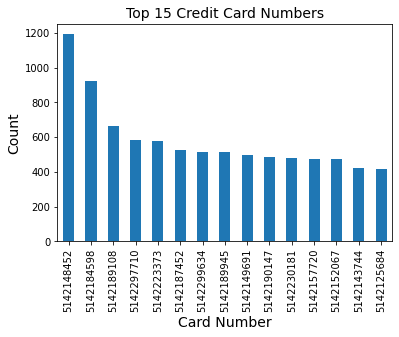

In [ ]:
#Card Number
data['Cardnum'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Credit Card Numbers',fontsize=14)
plt.xlabel('Card Number',fontsize=14)
plt.ylabel('Count',fontsize=14)

In [ ]:
(data['Cardnum'] == 5142148452).sum()

1192

Text(0, 0.5, 'Log Count')

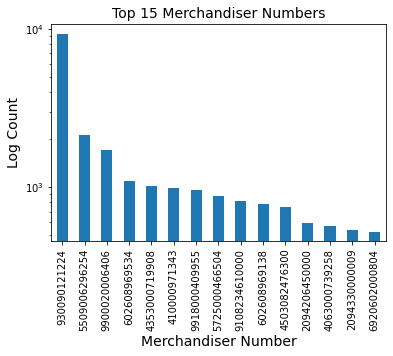

In [ ]:
#Merch Number
#Do a Histogram?
data['Merchnum'].value_counts().head(15).plot(kind='bar',logy=True)
plt.title('Top 15 Merchandiser Numbers',fontsize=14)
plt.xlabel('Merchandiser Number',fontsize=14)
plt.ylabel('Log Count',fontsize=14)

In [ ]:
(data['Merchnum'] == '930090121224').sum()

9310

In [ ]:
data['Merchnum'] = data['Merchnum'].astype(str)

In [ ]:
(data['Merchnum']=='nan').sum()

3375

Text(0, 0.5, 'Log Count')

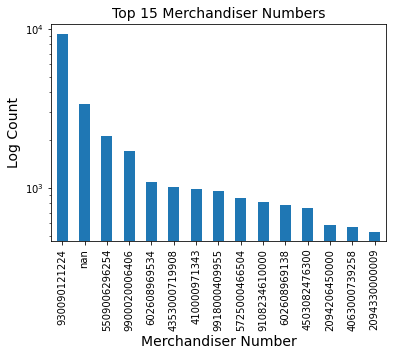

In [ ]:
data['Merchnum'].value_counts().head(15).plot(kind='bar',logy=True)
plt.title('Top 15 Merchandiser Numbers',fontsize=14)
plt.xlabel('Merchandiser Number',fontsize=14)
plt.ylabel('Log Count',fontsize=14)

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Merch Number'),
 Text(0.5, 1.0, 'Merch Number Frequency')]

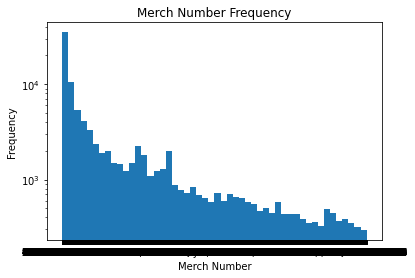

In [ ]:
plt.hist(data['Merchnum'], bins=50)
plt.yscale('log')
plt.gca().set(title='Merch Number Frequency', ylabel='Frequency',xlabel='Merch Number')

Text(0, 0.5, 'Count')

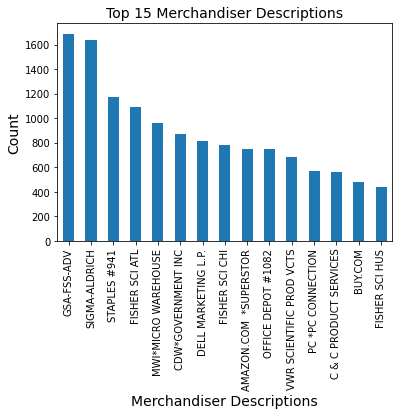

In [ ]:
#Merch Description
data['Merch description'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Merchandiser Descriptions',fontsize=14)
plt.xlabel('Merchandiser Descriptions',fontsize=14)
plt.ylabel('Count',fontsize=14)

In [ ]:
(data['Merch description']=='GSA-FSS-ADV').sum()

1688

Text(0, 0.5, 'Count')

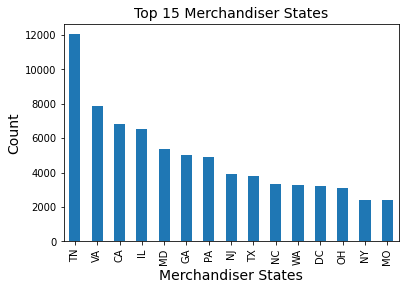

In [ ]:
#Merch State
data['Merch state'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Merchandiser States',fontsize=14)
plt.xlabel('Merchandiser States',fontsize=14)
plt.ylabel('Count',fontsize=14)

In [ ]:
(data['Merch state']=='TN').sum()

12035

In [ ]:
data['Merch zip'] = data['Merch zip'].astype(str)

Text(0, 0.5, 'Log Count')

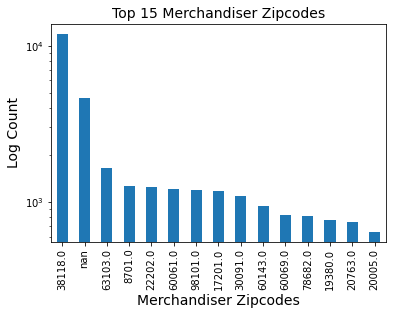

In [ ]:
#Merch Zip
#remove zero from zipcode?
data['Merch zip'].value_counts().head(15).plot(kind='bar',logy=True)
plt.title('Top 15 Merchandiser Zipcodes',fontsize=14)
plt.xlabel('Merchandiser Zipcodes',fontsize=14)
plt.ylabel('Log Count',fontsize=14)

In [ ]:
(data['Merch zip']=='38118.0').sum()

11868

Text(0, 0.5, 'Log Count')

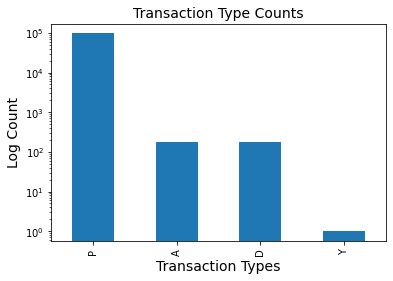

In [ ]:
#Transtype
data['Transtype'].value_counts().head(15).plot(kind='bar',logy=True)
plt.title('Transaction Type Counts',fontsize=14)
plt.xlabel('Transaction Types',fontsize=14)
plt.ylabel('Log Count',fontsize=14)


In [ ]:
(data['Transtype']=='P').sum()

96398

Text(0, 0.5, 'Log Count')

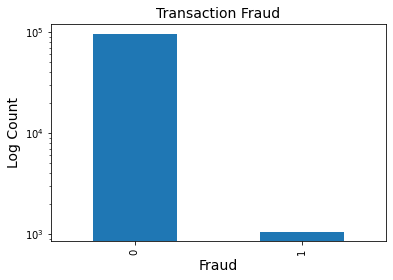

In [ ]:
#Fraud
data['Fraud'].value_counts().head(15).plot(kind='bar',logy=True)
plt.title('Transaction Fraud',fontsize=14)
plt.xlabel('Fraud',fontsize=14)
plt.ylabel('Log Count',fontsize=14)

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Transaction Amount'),
 Text(0.5, 1.0, 'Transaction Amount Frequency')]

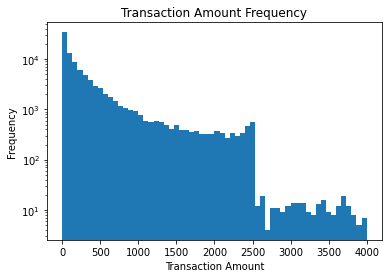

In [ ]:
#Amount
xrange = data[(data['Amount'] >= 0) & (data['Amount'] <= 4000)]
plt.hist(xrange['Amount'], bins=60)
plt.yscale('log')
plt.gca().set(title='Transaction Amount Frequency', ylabel='Frequency',xlabel='Transaction Amount')

In [ ]:
xrange = data[(data['Amount'] >= 0) & (data['Amount'] <= 5000)]
xrange

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [ ]:
#Fraud
data['Fraud'].value_counts().head(15).plot(kind='bar',logy=True)
plt.title('Fraud Counts',fontsize=14)
plt.xlabel('Fraud (0 = No Fraud, 1 = Fraud)',fontsize=14)
plt.ylabel('Log Count',fontsize=14)

In [ ]:
data['Fraud'].sum()

1059

In [ ]:
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]

In [ ]:
numrecords = len(data)
print(numrecords)

96753


In [ ]:
print(len(goods))

95694


In [ ]:
print(len(bads))

1059


In [ ]:
print(len(goods) + len(bads))

96753


In [ ]:
len(data['Recnum'].unique())

96753

In [ ]:
len(data['Recnum']) * 100 / numrecords

100.0

In [ ]:
len(data['Date']) * 100 / numrecords

100.0

In [ ]:
len(data['Date'].unique())

365

In [ ]:
count_day = data.groupby('Date').count()
count_day.head(10)

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,
2010-01-01,51,51,51,51,51,51,51,51,51
2010-01-02,29,29,29,29,29,10,29,29,29
2010-01-03,159,159,153,159,157,153,159,159,159
2010-01-04,229,229,221,229,226,221,229,229,229
2010-01-05,309,309,286,309,299,297,309,309,309
2010-01-06,330,330,317,330,328,321,330,330,330
2010-01-07,307,307,292,307,305,294,307,307,307
2010-01-08,104,104,104,104,104,104,104,104,104
2010-01-09,19,19,19,19,19,19,19,19,19


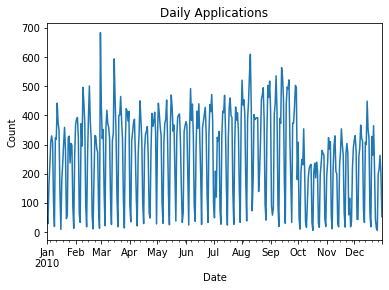

In [ ]:
daily_count = data.assign(trx = np.ones(numrecords)).set_index(data['Date']).resample(dt.timedelta(days = 1))\
    .count().trx
daily_count.plot(title = 'Daily Applications',xlabel='Date',ylabel='Count')

In [ ]:
daily_count.head(70)

Date
2010-01-01     51
2010-01-02     29
2010-01-03    159
2010-01-04    229
2010-01-05    309
             ... 
2010-03-07    418
2010-03-08    372
2010-03-09    359
2010-03-10    320
2010-03-11    113
Freq: D, Name: trx, Length: 70, dtype: int64

In [ ]:
# daily_count['2016-02-29'] = daily_count['2016-02-28']
# daily_count.head(70)

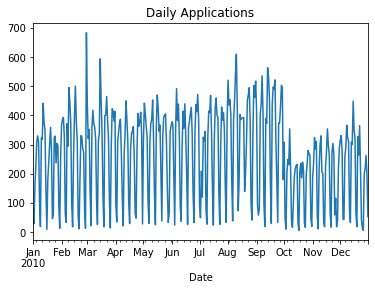

In [ ]:
daily_count.plot(title = 'Daily Applications')

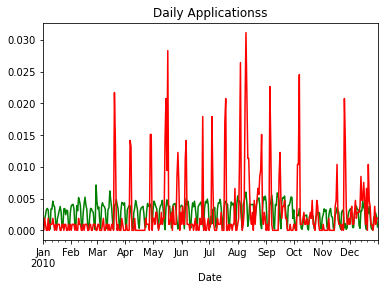

In [ ]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Applicationss', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

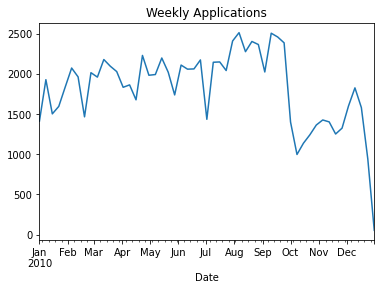

In [ ]:
weekly_applications = data.assign(trx = np.ones(numrecords)).set_index(data['Date']).resample(dt.timedelta(days = 7))\
    .count().trx
weekly_applications.plot(title = 'Weekly Applications')

In [ ]:
weekly_applications.head(60)

Date
2010-01-01    1414
2010-01-08    1930
2010-01-15    1504
2010-01-22    1597
2010-01-29    1838
2010-02-05    2075
2010-02-12    1965
2010-02-19    1467
2010-02-26    2017
2010-03-05    1962
2010-03-12    2181
2010-03-19    2098
2010-03-26    2031
2010-04-02    1835
2010-04-09    1865
2010-04-16    1679
2010-04-23    2232
2010-04-30    1985
2010-05-07    1994
2010-05-14    2200
2010-05-21    2023
2010-05-28    1740
2010-06-04    2112
2010-06-11    2061
2010-06-18    2064
2010-06-25    2176
2010-07-02    1436
2010-07-09    2147
2010-07-16    2151
2010-07-23    2044
2010-07-30    2412
2010-08-06    2516
2010-08-13    2279
2010-08-20    2406
2010-08-27    2368
2010-09-03    2026
2010-09-10    2509
2010-09-17    2462
2010-09-24    2389
2010-10-01    1402
2010-10-08     998
2010-10-15    1138
2010-10-22    1243
2010-10-29    1365
2010-11-05    1428
2010-11-12    1404
2010-11-19    1253
2010-11-26    1326
2010-12-03    1602
2010-12-10    1828
2010-12-17    1582
2010-12-24     941
2010-12

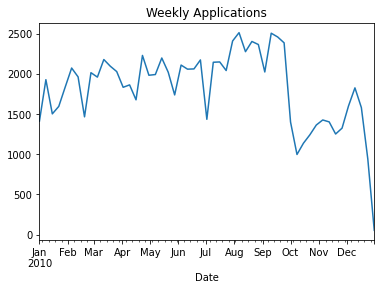

In [ ]:

weekly_applications.plot(title = 'Weekly Applications')

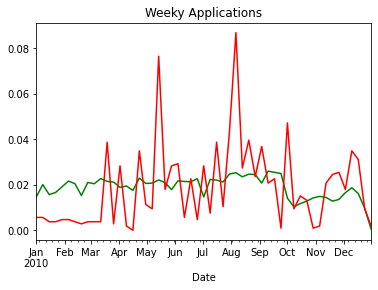

In [ ]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 7)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Applications', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 7)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

In [ ]:
len(data['ssn']) * 100 / numrecords

100.0

In [ ]:
len(data['ssn'].unique())

835819

In [ ]:
data['ssn'].value_counts()

999999999    16935
938972725      114
810776805       81
829352390       74
473311863       44
             ...  
571979227        1
154696808        1
962389432        1
746697518        1
361232148        1
Name: ssn, Length: 835819, dtype: int64

<AxesSubplot:>

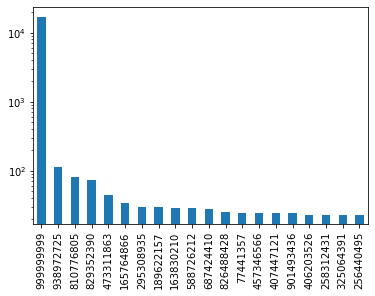

In [ ]:
data['ssn'].value_counts().head(20).plot(kind='bar',logy=True)

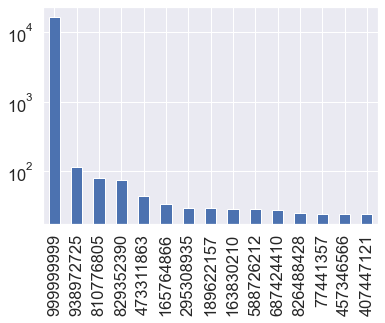

In [ ]:
sns.set(font_scale=1.5)
data['ssn'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')

In [ ]:
data[data['ssn'] == 999999999].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
10,11,2017-01-01,999999999,UZZSMXSEE,USJZUSA,726 UMTXU ST,92129,19400126,3026547212,0
22,23,2017-01-01,999999999,ETXMUSZEM,UJMAMEU,3387 STRUM WY,45982,19580830,5568704443,0
64,65,2017-01-01,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,19070626,9999999999,0
68,69,2017-01-01,999999999,UUZAJXZMT,SRAAMZXU,2557 URRXS DR,98407,20110831,5490098836,0
74,75,2017-01-01,999999999,AUATMMZX,UUUTAZR,30 ETXRM ST,38402,19760625,2382673773,0
283,284,2017-01-01,999999999,MSJUZSMZJ,UXMTEZUT,356 UZSRE AVE,74187,19070626,153492955,0
380,381,2017-01-01,999999999,XRJSMRRRT,RMRXAMX,9769 UAMZJ DR,52351,19070626,3181686949,0
420,421,2017-01-01,999999999,XRXMTMZEZ,SZRXXJMX,5854 RXRXX PL,34957,19970721,316681200,0
446,447,2017-01-01,999999999,RRZUZUSX,ESZRRRAA,8970 AXME RD,48333,19110729,5350782211,0
468,469,2017-01-01,999999999,XETRJXESR,SSJXTUJM,6995 RMSST CT,48162,19700418,2503172355,0


In [ ]:
len(data[data['ssn'] == 999999999])

16935

In [ ]:
data.loc[data['ssn'] == 999999999, 'ssn'] = data.loc[data['ssn'] == 999999999, 'record']

In [ ]:
len(data[data['ssn'] == 999999999])

0

In [ ]:
data.head(25)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


<AxesSubplot:>

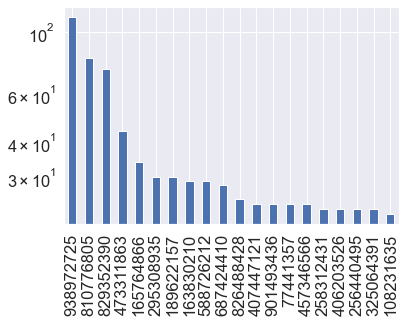

In [ ]:
data['ssn'].value_counts().head(20).plot(kind='bar',logy=True)

In [ ]:
len(data['firstname']) * 100 / numrecords

100.0

In [ ]:
len(data['firstname'].unique())

78136

In [ ]:
data['firstname'].value_counts()

EAMSTRMT     12658
TXEMXZZM     10297
UXXJJZTUZ    10235
UJSRSMUEZ     9994
SREZUJMJU     9688
             ...  
TUSSMZJA         1
SSAZJXSRM        1
UATETTATJ        1
UASJMZXZJ        1
RUZUJJRMX        1
Name: firstname, Length: 78136, dtype: int64

<AxesSubplot:>

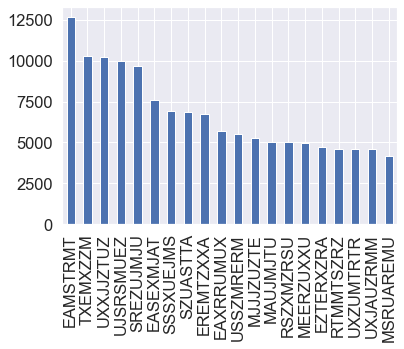

In [ ]:
data['firstname'].value_counts().head(20).plot(kind='bar')

In [ ]:
len(data['lastname']) * 100 / numrecords

100.0

In [ ]:
len(data['lastname'].unique())

177001

In [ ]:
data['lastname'].value_counts()

ERJSAXA     8580
UMXUUUSE    7156
UMARRMA     6832
MEAXJUX     5492
XMERRR      5451
            ... 
RMJZJRMJ       1
SSUTSMUM       1
EXASZEXS       1
UERZXTTR       1
RMJZURRS       1
Name: lastname, Length: 177001, dtype: int64

<AxesSubplot:>

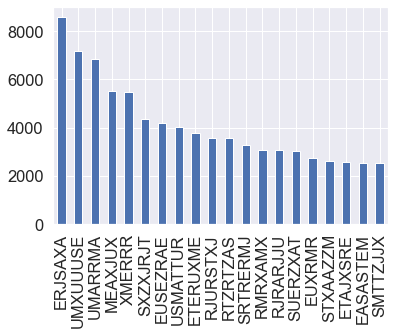

In [ ]:
data['lastname'].value_counts().head(20).plot(kind='bar')

In [ ]:
len(data['address']) * 100 / numrecords

100.0

In [ ]:
len(data['address'].unique())

828774

In [ ]:
data['address'].value_counts()

123 MAIN ST        1079
1775 XJXE LN         97
7433 RAEZA ST        80
8911 MZSU DR         74
4907 RRAAU DR        73
                   ... 
1179 RATUS BLVD       1
8006 SSRJM ST         1
6327 MAXR ST          1
4937 ESAMR LN         1
3408 UZZAM WY         1
Name: address, Length: 828774, dtype: int64

<AxesSubplot:>

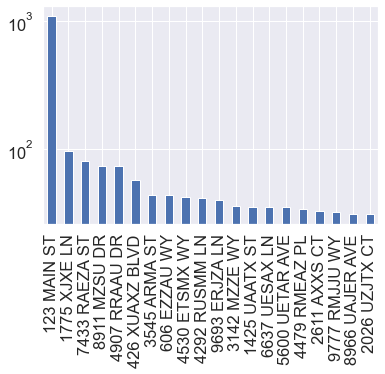

In [ ]:
data['address'].value_counts().head(20).plot(kind='bar',logy=True)

In [ ]:
data[data['address'] == '123 MAIN ST'].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
1247,1248,2017-01-01,904524264,UJSRSMUEZ,EAXAXAXA,123 MAIN ST,68138,19241031,8135264540,0
2191,2192,2017-01-01,345413970,XXSMUSEJT,SRRAXESJ,123 MAIN ST,68138,19300526,94097353,0
2529,2530,2017-01-01,821839005,UXZUMTRTR,EARTMRJS,123 MAIN ST,68138,19621101,7715547340,0
3434,3435,2017-01-02,24205988,SXTUZZXAS,UJJAJMM,123 MAIN ST,68138,19640428,8788942828,0
3750,3751,2017-01-02,623763056,SEZESJMSR,UZJEUZMT,123 MAIN ST,68138,19731107,974228226,0
4715,4716,2017-01-02,686787130,SXXSZJMM,ARRZTAA,123 MAIN ST,68138,19810323,1839236819,1
5353,5354,2017-01-02,932938215,UXRJESTM,EETAEAR,123 MAIN ST,68138,19980513,5441682419,0
7299,7300,2017-01-03,417080344,SJETUJAAZ,REMJTREU,123 MAIN ST,92821,19340914,7507186577,0
8512,8513,2017-01-04,477797652,EAMSTRMT,UTXXZZET,123 MAIN ST,68138,19190519,5922864904,0
8750,8751,2017-01-04,6367698,XUERJXSTU,EERMEXAE,123 MAIN ST,42035,19821127,6442565981,0


In [ ]:
len(data['zip5']) * 100 / numrecords

100.0

In [ ]:
len(data['zip5'].unique())

26370

In [ ]:
data['zip5'].value_counts()

68138    823
90042    514
89835    489
35227    478
14931    459
        ... 
1599       1
69474      1
51017      1
25995      1
21226      1
Name: zip5, Length: 26370, dtype: int64

<AxesSubplot:>

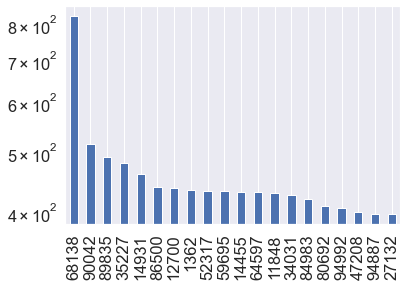

In [ ]:
data['zip5'].value_counts().head(20).plot(kind='bar',logy=True)

In [ ]:
data['fulladdress'] = data['address'] + ' ' + data['zip5'].astype('str')
# data = data.drop(columns = ['zip5', 'address'])

<AxesSubplot:>

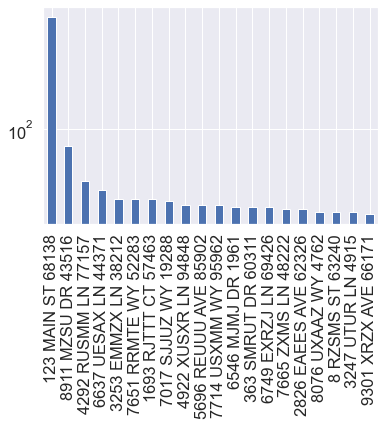

In [ ]:
data['fulladdress'].value_counts().head(20).plot(kind='bar',logy=True)

In [ ]:
old_address = [data.iloc[1247]['address'],data.iloc[2191]['address'],data.iloc[2529]['address']]
print(old_address)

['123 MAIN ST', '123 MAIN ST', '123 MAIN ST']


In [ ]:
len(data[data['address'] == '123 MAIN ST'])

1079

In [ ]:
data.loc[data['address'] == '123 MAIN ST', 'address'] = data.loc[data['address'] == '123 MAIN ST', 'record'].astype('str')

In [ ]:
len(data[data['address'] == '123 MAIN ST'])

0

In [ ]:
new_address = [data.iloc[1247]['address'],data.iloc[2191]['address'],data.iloc[2529]['address']]
print(new_address)

['1248', '2192', '2530']


In [ ]:
data['fulladdress'] = data['address'] + ' ' + data['zip5'].astype('str')
# data = data.drop(columns = ['zip5', 'address'])

<AxesSubplot:>

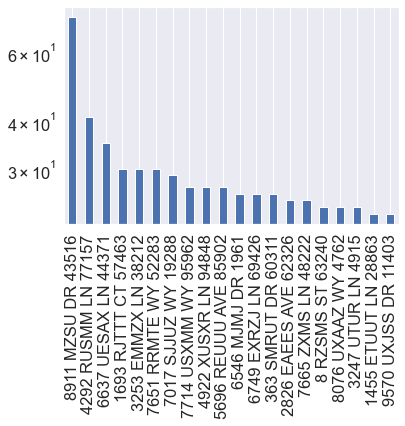

In [ ]:
data['fulladdress'].value_counts().head(20).plot(kind='bar',logy=True)

In [ ]:
len(data['dob']) * 100 / numrecords

100.0

In [ ]:
len(data['dob'].unique())

42673

In [ ]:
data['dob'].value_counts()

19070626    126568
19640318      4818
19760625      3723
19880628      1404
19740216       980
             ...  
19280730         5
19860313         5
19190223         5
19441127         5
19960904         5
Name: dob, Length: 42673, dtype: int64

<AxesSubplot:>

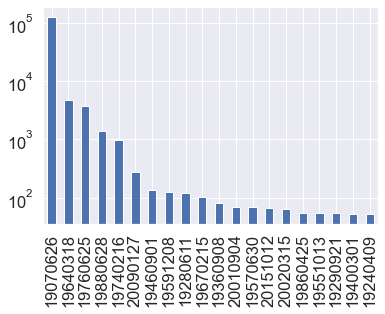

In [ ]:
data['dob'].value_counts().head(20).plot(kind='bar',logy=True)

In [ ]:
data.loc[data['dob'] == 19070626, 'dob'] = data.loc[data['dob'] == 19070626, 'record']

<AxesSubplot:>

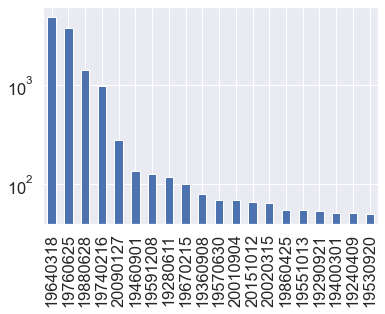

In [ ]:
data['dob'].value_counts().head(20).plot(kind='bar',logy=True)

In [ ]:
len(data['homephone']) * 100 / numrecords

100.0

In [ ]:
len(data['homephone'].unique())

28244

In [ ]:
data['homephone'].value_counts()

9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
              ...  
3450484388        1
5376503138        1
7106175831        1
5010200060        1
6271618925        1
Name: homephone, Length: 28244, dtype: int64

<AxesSubplot:>

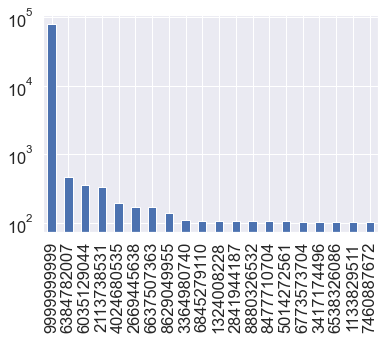

In [ ]:
data['homephone'].value_counts().head(20).plot(kind='bar',logy=True)

In [ ]:
data[data['homephone'] == 9999999999].head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,fulladdress
17,18,2017-01-01,346374636,XRSSZZUXT,ETXZXJAJ,5719 UEZJT PL,51486,19500110,9999999999,0,5719 UEZJT PL 51486
26,27,2017-01-01,735495403,EMSSTSXUA,STZRUXZM,9323 STRMS PL,51395,19881111,9999999999,0,9323 STRMS PL 51395
60,61,2017-01-01,780136117,UZTZEETU,ARUZTZM,5317 UTXME ST,37840,19731129,9999999999,0,5317 UTXME ST 37840
64,65,2017-01-01,65,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,65,9999999999,0,6393 UEJEA LN 41640
145,146,2017-01-01,671506143,TXEMXZZM,SRTERSRA,5795 UMUTM BLVD,45077,19030913,9999999999,0,5795 UMUTM BLVD 45077
149,150,2017-01-01,149112205,EZTERXZRA,EERMAXJU,2249 XXAU DR,27375,19841206,9999999999,0,2249 XXAU DR 27375
178,179,2017-01-01,507916615,EUEJUURAR,XUSMXRU,8314 XXMX DR,398,19720416,9999999999,0,8314 XXMX DR 398
179,180,2017-01-01,106080337,SRARXRMRM,UTJMRJUX,8413 URUEU WY,15746,180,9999999999,0,8413 URUEU WY 15746
180,181,2017-01-01,291680381,MUSXJTSSX,EXAAJUT,9762 SXJXM LN,41694,19620504,9999999999,0,9762 SXJXM LN 41694
200,201,2017-01-01,13382014,EAMSTRMT,RURSXSXX,372 SXTEA DR,42716,201,9999999999,0,372 SXTEA DR 42716


In [ ]:
len(data[data['homephone'] == 9999999999])

78512

In [ ]:
data.loc[data['homephone'] == 9999999999, 'homephone'] = data.loc[data['homephone'] == 9999999999, 'record']

In [ ]:
len(data[data['homephone'] == 9999999999])

0

In [ ]:
data.head(30)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,fulladdress
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115,0,6861 EUTST PL 2765
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,7280 URASA PL 57169
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,3,216537580,0,5581 RSREX LN 56721
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0,1387 UJZXJ RD 35286
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0,279 EAASA WY 3173
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0,4322 USJXU LN 8391
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0,478 EEXUM LN 41640
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0,8906 UUAJ PL 60567
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0,8266 SSEAR RD 37934
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0,9166 XXSAZ PL 93751


<AxesSubplot:>

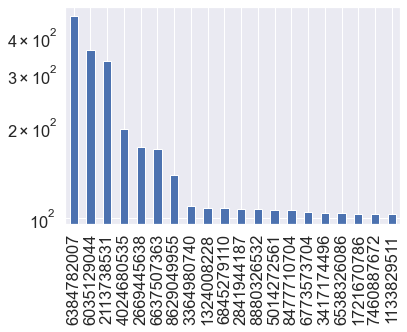

In [ ]:
data['homephone'].value_counts().head(20).plot(kind='bar',logy=True)

In [ ]:
data = data.drop(columns = 'fulladdress')
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115,0
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,3,216537580,0
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


In [ ]:
data.shape

(1000000, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   record       1000000 non-null  int64         
 1   date         1000000 non-null  datetime64[ns]
 2   ssn          1000000 non-null  int64         
 3   firstname    1000000 non-null  object        
 4   lastname     1000000 non-null  object        
 5   address      1000000 non-null  object        
 6   zip5         1000000 non-null  int64         
 7   dob          1000000 non-null  int64         
 8   homephone    1000000 non-null  int64         
 9   fraud_label  1000000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 76.3+ MB


In [ ]:
data.describe()

,record,ssn,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,500000.500000,4.914150e+08,50073.333143,1.716682e+07,4.583635e+09,0.014393
std,288675.278933,2.934649e+08,28915.921546,6.353070e+06,3.076022e+09,0.119104
min,1.000000,1.100000e+01,2.000000,1.000000e+00,1.800000e+01,0.000000
25%,250000.750000,2.370395e+08,24992.000000,1.916092e+07,1.857659e+09,0.000000
50%,500000.500000,4.916291e+08,50492.000000,1.950090e+07,4.544521e+09,0.000000
75%,750000.250000,7.457676e+08,74496.000000,1.983032e+07,7.254188e+09,0.000000
max,1000000.000000,9.999999e+08,99999.000000,2.016103e+07,9.999318e+09,1.000000


In [ ]:
# data.to_csv('applications clean.csv', index = False)

In [ ]:
print('duration: ', dt.datetime.now()-start_time)

duration:  0:00:20.233737
